In [17]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [18]:
bs = 32
iz = 244

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset",            
    shuffle = True,
    seed = 16,
    image_size = (iz, iz),
    batch_size = bs
)

Found 8226 files belonging to 6 classes.


In [19]:
class_names = dataset.class_names
print (class_names) 

['Athracnose', 'BlankCanker', 'DiplodiaRot', 'Leaf spot Leaf', 'Leaf spot fruit', 'MealyBug']


In [20]:
# Dividing the dataset

ts = int(len(dataset)*0.8)
vs = int(len(dataset)*0.1)

training_ds = dataset.take(ts)
remaining_ds = dataset.skip(ts)
validation_ds = remaining_ds.take(vs)
testing_ds = remaining_ds.skip(vs)

print("Length of training dataset : ", len(training_ds))
print("Length of validation dataset : ", len(validation_ds))
print("Length of testing dataset : ", len(testing_ds))

Length of training dataset :  206
Length of validation dataset :  25
Length of testing dataset :  27


In [21]:
from tensorflow.keras.applications import VGG16

# Get the number of classes and set up the base model
num_classes = len(dataset.class_names)

def build_pretrained_model():
    base_model = VGG16(include_top=False, weights='imagenet', input_shape=(iz, iz, 3))

    # Freeze the base model's layers
    base_model.trainable = False

    # Add custom classifier on top
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model


model = build_pretrained_model()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    training_ds,
    validation_data = validation_ds,
    epochs = 20
)

Epoch 1/20
206/206 [==============================] - 40s 186ms/step - loss: 1.3309 - accuracy: 0.6914 - val_loss: 0.2525 - val_accuracy: 0.9287
Epoch 2/20
206/206 [==============================] - 43s 205ms/step - loss: 0.3395 - accuracy: 0.8811 - val_loss: 0.1444 - val_accuracy: 0.9663
Epoch 3/20
206/206 [==============================] - 41s 200ms/step - loss: 0.2082 - accuracy: 0.9260 - val_loss: 0.0859 - val_accuracy: 0.9825
Epoch 4/20
206/206 [==============================] - 42s 204ms/step - loss: 0.1421 - accuracy: 0.9536 - val_loss: 0.0611 - val_accuracy: 0.9912
Epoch 5/20
206/206 [==============================] - 43s 209ms/step - loss: 0.1111 - accuracy: 0.9613 - val_loss: 0.0588 - val_accuracy: 0.9850
Epoch 6/20
206/206 [==============================] - 43s 206ms/step - loss: 0.0851 - accuracy: 0.9712 - val_loss: 0.0342 - val_accuracy: 0.9925
Epoch 7/20
206/206 [==============================] - 44s 210ms/step - loss: 0.0745 - accuracy: 0.9753 - val_loss: 0.0388 - val_ac

In [22]:
scores = model.evaluate(testing_ds)
scores

27/27 [==============================] - 12s 124ms/step - loss: 0.0217 - accuracy: 0.9964


[0.021699417382478714, 0.9964028596878052]

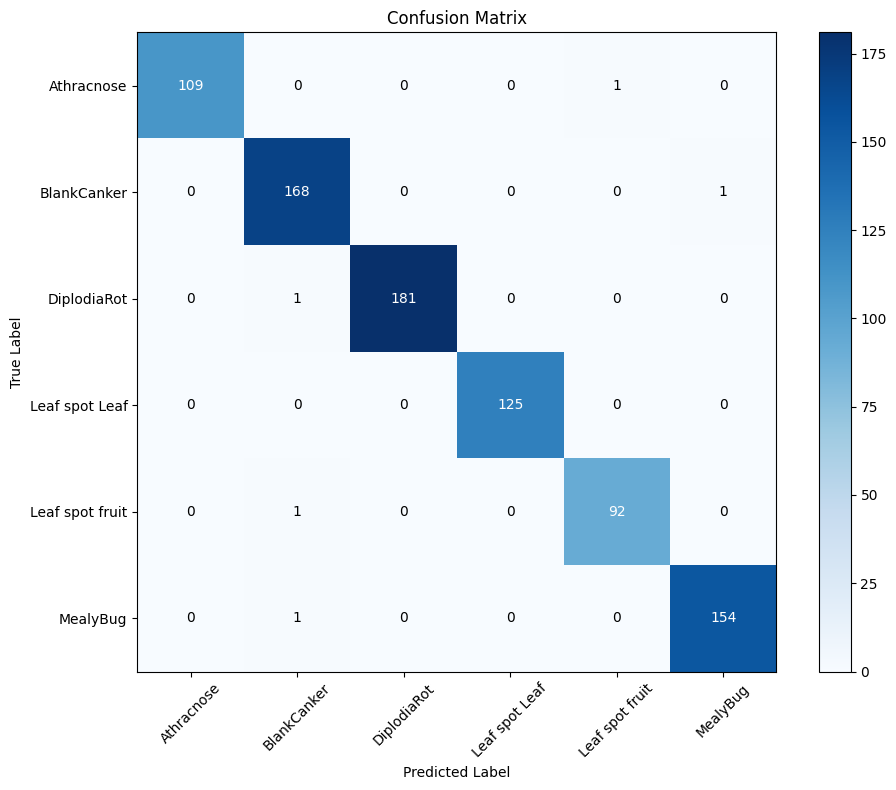

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Generate confusion matrix on testing dataset
y_true = []
y_pred = []
for images, labels in testing_ds:
    predictions = model.predict(images, verbose=0)
    predicted_labels = tf.argmax(predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels.numpy())

# Create and plot the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=range(num_classes))
class_names = dataset.class_names

# Plot confusion matrix with colors
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)

# Add labels to each cell
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [24]:
from sklearn.metrics import classification_report

# Create a list to store the true labels and predicted labels
y_true_test = []
y_pred_classes_test = []

# Iterate through the testing dataset to get true labels and predictions
for images, labels in testing_ds:
    y_true_test.extend(labels.numpy())
    predictions = model.predict(images, verbose=0)  # Replace 'your_model' with the actual model
    y_pred_classes_test.extend(np.argmax(predictions, axis=1))

# Convert the label indices to class names
class_names = dataset.class_names
y_true_class_names = [class_names[i] for i in y_true_test]
y_pred_class_names = [class_names[i] for i in y_pred_classes_test]

# Calculate and print the classification report
report_test = classification_report(y_true_class_names, y_pred_class_names, target_names=class_names)

print(report_test)

                 precision    recall  f1-score   support

     Athracnose       1.00      0.99      1.00       112
    BlankCanker       0.99      0.99      0.99       171
    DiplodiaRot       1.00      1.00      1.00       176
 Leaf spot Leaf       1.00      1.00      1.00       133
Leaf spot fruit       0.99      0.99      0.99        93
       MealyBug       0.99      1.00      1.00       149

       accuracy                           1.00       834
      macro avg       1.00      1.00      1.00       834
   weighted avg       1.00      1.00      1.00       834



In [25]:
from tensorflow.keras.applications import ResNet50

# Get the number of classes and set up the base model
num_classes = len(dataset.class_names)

def build_pretrained_model():
    base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(iz, iz, 3))

    # Freeze the base model's layers
    base_model.trainable = False

    # Add custom classifier on top
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model


model = build_pretrained_model()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    training_ds,
    validation_data = validation_ds,
    epochs = 20
)

Epoch 1/20
206/206 [==============================] - 39s 169ms/step - loss: 0.6945 - accuracy: 0.7530 - val_loss: 0.2733 - val_accuracy: 0.9237
Epoch 2/20
206/206 [==============================] - 35s 170ms/step - loss: 0.2873 - accuracy: 0.8964 - val_loss: 0.1459 - val_accuracy: 0.9575
Epoch 3/20
206/206 [==============================] - 34s 165ms/step - loss: 0.1856 - accuracy: 0.9342 - val_loss: 0.0775 - val_accuracy: 0.9812
Epoch 4/20
206/206 [==============================] - 35s 170ms/step - loss: 0.1239 - accuracy: 0.9587 - val_loss: 0.0691 - val_accuracy: 0.9812
Epoch 5/20
206/206 [==============================] - 35s 168ms/step - loss: 0.1066 - accuracy: 0.9648 - val_loss: 0.0454 - val_accuracy: 0.9862
Epoch 6/20
206/206 [==============================] - 34s 165ms/step - loss: 0.0786 - accuracy: 0.9754 - val_loss: 0.0394 - val_accuracy: 0.9887
Epoch 7/20
206/206 [==============================] - 34s 165ms/step - loss: 0.0777 - accuracy: 0.9733 - val_loss: 0.0412 - val_ac

In [26]:
scores = model.evaluate(testing_ds)
scores

27/27 [==============================] - 13s 101ms/step - loss: 0.0212 - accuracy: 0.9928


[0.021170593798160553, 0.9928057789802551]

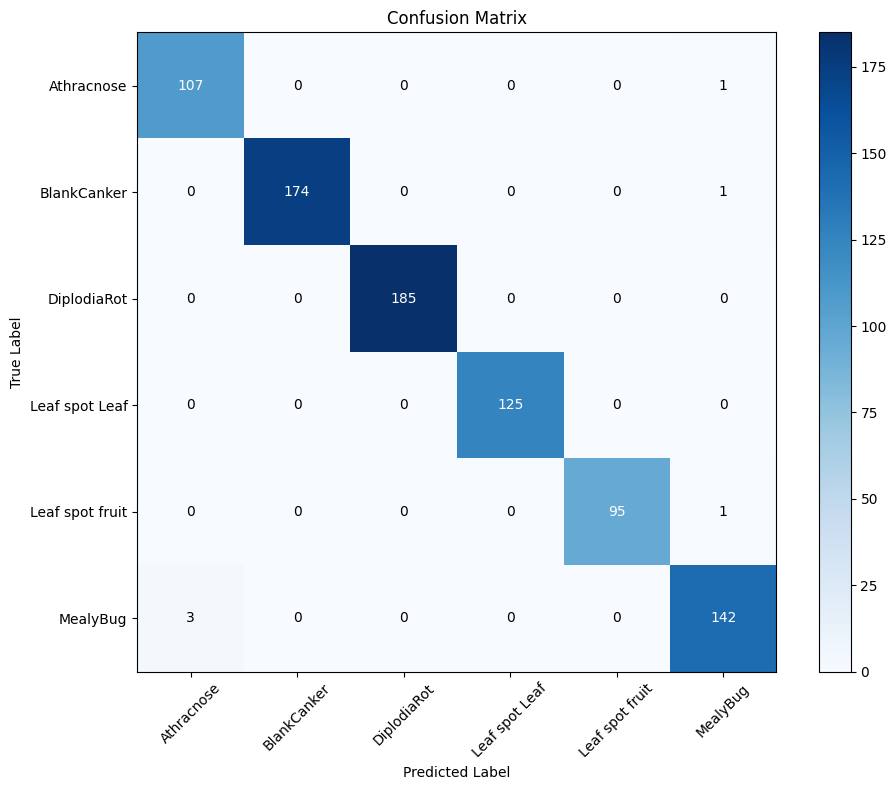

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Generate confusion matrix on testing dataset
y_true = []
y_pred = []
for images, labels in testing_ds:
    predictions = model.predict(images, verbose=0)
    predicted_labels = tf.argmax(predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels.numpy())

# Create and plot the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=range(num_classes))
class_names = dataset.class_names

# Plot confusion matrix with colors
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)

# Add labels to each cell
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [28]:
from sklearn.metrics import classification_report

# Create a list to store the true labels and predicted labels
y_true_test = []
y_pred_classes_test = []

# Iterate through the testing dataset to get true labels and predictions
for images, labels in testing_ds:
    y_true_test.extend(labels.numpy())
    predictions = model.predict(images, verbose=0)  # Replace 'your_model' with the actual model
    y_pred_classes_test.extend(np.argmax(predictions, axis=1))

# Convert the label indices to class names
class_names = dataset.class_names
y_true_class_names = [class_names[i] for i in y_true_test]
y_pred_class_names = [class_names[i] for i in y_pred_classes_test]

# Calculate and print the classification report
report_test = classification_report(y_true_class_names, y_pred_class_names, target_names=class_names)

print(report_test)

                 precision    recall  f1-score   support

     Athracnose       0.97      0.99      0.98       111
    BlankCanker       1.00      0.99      1.00       174
    DiplodiaRot       1.00      1.00      1.00       185
 Leaf spot Leaf       1.00      1.00      1.00       129
Leaf spot fruit       1.00      0.99      0.99        93
       MealyBug       0.98      0.98      0.98       142

       accuracy                           0.99       834
      macro avg       0.99      0.99      0.99       834
   weighted avg       0.99      0.99      0.99       834



In [29]:
from tensorflow.keras.applications import MobileNetV2

# Get the number of classes and set up the base model
num_classes = len(dataset.class_names)

def build_pretrained_model():
    base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(iz, iz, 3))

    # Freeze the base model's layers
    base_model.trainable = False

    # Add custom classifier on top
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model


model = build_pretrained_model()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    training_ds,
    validation_data = validation_ds,
    epochs = 20
)

Epoch 1/20
206/206 [==============================] - 27s 113ms/step - loss: 1.3834 - accuracy: 0.4669 - val_loss: 1.1056 - val_accuracy: 0.6012
Epoch 2/20
206/206 [==============================] - 23s 110ms/step - loss: 1.0737 - accuracy: 0.5850 - val_loss: 0.9017 - val_accuracy: 0.6800
Epoch 3/20
206/206 [==============================] - 23s 110ms/step - loss: 0.9191 - accuracy: 0.6506 - val_loss: 0.7895 - val_accuracy: 0.7437
Epoch 4/20
206/206 [==============================] - 23s 109ms/step - loss: 0.8159 - accuracy: 0.6972 - val_loss: 0.7395 - val_accuracy: 0.7337
Epoch 5/20
206/206 [==============================] - 23s 111ms/step - loss: 0.7421 - accuracy: 0.7266 - val_loss: 0.6205 - val_accuracy: 0.7925
Epoch 6/20
206/206 [==============================] - 23s 109ms/step - loss: 0.6672 - accuracy: 0.7523 - val_loss: 0.5869 - val_accuracy: 0.8075
Epoch 7/20
206/206 [==============================] - 22s 104ms/step - loss: 0.6185 - accuracy: 0.7749 - val_loss: 0.5428 - val_ac

In [30]:
scores = model.evaluate(testing_ds)
scores

27/27 [==============================] - 11s 54ms/step - loss: 0.2692 - accuracy: 0.9089


[0.2691764533519745, 0.9088729023933411]

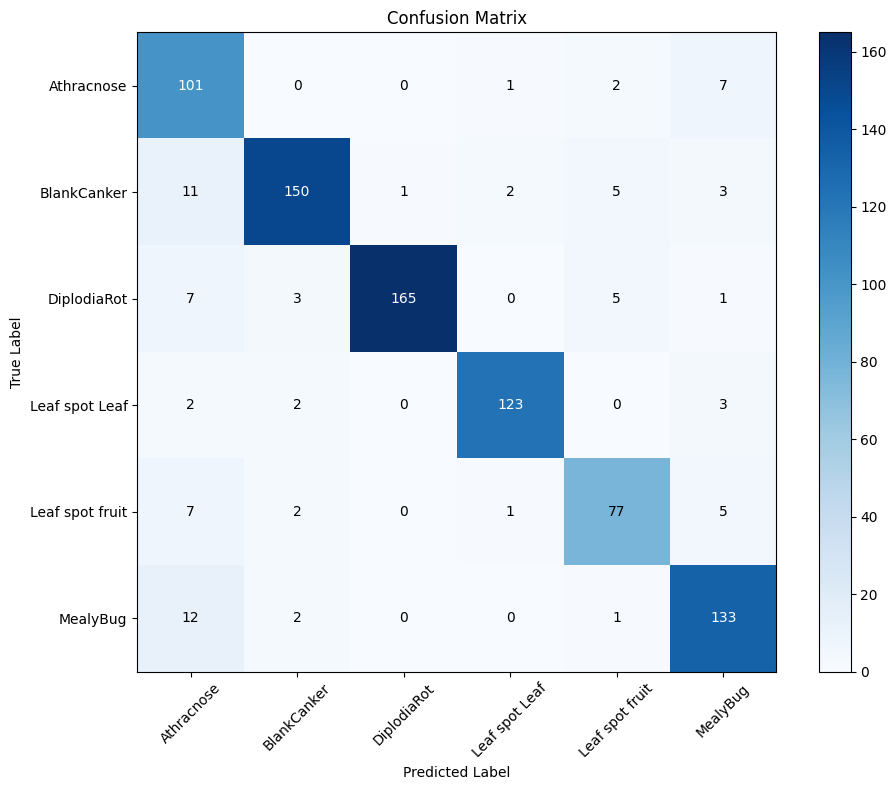

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Generate confusion matrix on testing dataset
y_true = []
y_pred = []
for images, labels in testing_ds:
    predictions = model.predict(images, verbose=0)
    predicted_labels = tf.argmax(predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels.numpy())

# Create and plot the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=range(num_classes))
class_names = dataset.class_names

# Plot confusion matrix with colors
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)

# Add labels to each cell
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [32]:
from sklearn.metrics import classification_report

# Create a list to store the true labels and predicted labels
y_true_test = []
y_pred_classes_test = []

# Iterate through the testing dataset to get true labels and predictions
for images, labels in testing_ds:
    y_true_test.extend(labels.numpy())
    predictions = model.predict(images, verbose=0)  # Replace 'your_model' with the actual model
    y_pred_classes_test.extend(np.argmax(predictions, axis=1))

# Convert the label indices to class names
class_names = dataset.class_names
y_true_class_names = [class_names[i] for i in y_true_test]
y_pred_class_names = [class_names[i] for i in y_pred_classes_test]

# Calculate and print the classification report
report_test = classification_report(y_true_class_names, y_pred_class_names, target_names=class_names)

print(report_test)

                 precision    recall  f1-score   support

     Athracnose       0.77      0.94      0.84       108
    BlankCanker       0.94      0.88      0.91       180
    DiplodiaRot       0.99      0.91      0.95       185
 Leaf spot Leaf       0.97      0.95      0.96       128
Leaf spot fruit       0.88      0.87      0.87        97
       MealyBug       0.88      0.93      0.90       136

       accuracy                           0.91       834
      macro avg       0.90      0.91      0.91       834
   weighted avg       0.92      0.91      0.91       834

